<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/unidade5_MMQ_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Unidade 5 - Aproximação de funções




Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: a **Interpolação** e o **Método dos Mínimos Quadrados**. A seguir, apresentamos alguns exemplos de resolução em *Python*. Vamos utilizar as bibliotecas [numpy](https://numpy.org/) e [scipy](https://scipy.github.io/devdocs/index.html).

**Motivação:**

Podemos estar interessados em extrair informações de um conjunto de dados de censos demográficos, que em geral ocorre a cada 10 anos. Como estimar a população em anos intermediários?

Podemos também aproximar funções $f(x)$ contínuas por uma combinação de polinômios ou funções trigonométricas, por exemplo.

Existem duas classes de métodos:


*   Método dos Mínimos Quadrados (MMQ): nosso objetivo é minimizar o resíduo entre os dados e uma função aproximadora.
*   Interpolação Polinomial: nesse caso exigimos que o polinômio aproximador "passe" pelos dados a serem aproximados.



# Método dos Mínimos Quadrados


**Problema Discreto:**

Objetivo: Minimizar resíduo (erro).

Para obter a melhor aproximação vamos minimizar a função:

$$  r({\bf a}) = \sum_{i=1}^m r_i({\bf a})^2,$$

sendo o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$.

Para ajustar os parâmetros da função $r({\bf a})$ vamos utilizar as bibliotecas *numpy* e *scipy*.

 *Assunto descrito em aula, para mais detalhes, veja material disponível no moodle.*

**Exemplo 1**

Ajustar os dados abaixo usando uma reta (Regressão linear):

$$\begin{array}{c|ccccc}
x_i & 0 & 0.25 & 0.5 & 0.75 & 1\\
\hline
y_i & 1 & 1.2840 & 1.6487 & 2.1170 & 2.7183 \\
\end{array}$$

*Solução:*

A função aproximadora é dada por $g(x)=a_0 + a_1x$.

a =  [0.89968 1.70784]
residuo: 0.039198364000000055


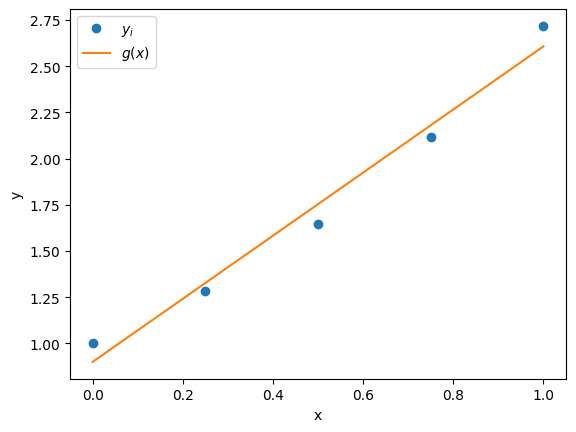

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def g(x, a):
    y = a[0] + a[1]*x
    return y

def difere(a, x, y):
    return g(x,a) - y

xi = np.array([0, 0.25,0.5, 0.75, 1])
yi = np.array([1, 1.2840, 1.6487, 2.117, 2.7183])

n = len(xi)
v1 = np.ones(n)

A = np.zeros((2,2))
b = np.zeros(2)
A[0][0] = np.vdot(v1,v1)
A[0][1] = np.vdot(v1,xi)
A[1][0] = A[0][1]
A[1][1] = np.vdot(xi,xi)

b[0] = np.vdot(v1,yi)
b[1] = np.vdot(xi,yi)

a = np.linalg.solve(A,b)
print("a = ", a)

res = 0
for i in range(n):
    res += difere(a, xi[i], yi[i])**2
print("residuo:", res)

x = np.linspace(xi[0],xi[n-1],100)
y = g(x, a)

plt.figure(1)
plt.plot(xi, yi, 'o', label = '$y_i$')
plt.plot(x, y, label = "$g(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Repita o exercício ajustando os dados com uma função quadrática: $g(x)=a_0+a_1x+a_2x^2$.

a =  [1.00513714 0.86418286 0.84365714]
residuo: 0.0002741325714285763


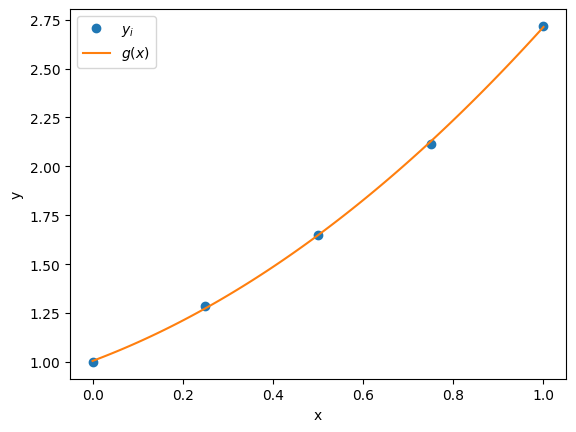

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def g(x, a):
    y = a[0] + a[1]*x + a[2]*x**2
    return y

def difere(a, x, y):
    return g(x,a) - y

xi = np.array([0, 0.25,0.5, 0.75, 1])
yi = np.array([1, 1.2840, 1.6487, 2.117, 2.7183])

n = len(xi)
v1 = np.ones(n)
xi2 = np.zeros(n)
for i in range(n):
    xi2[i] = xi[i]**2


A = np.zeros((3,3))
b = np.zeros(3)
A[0][0] = np.vdot(v1,v1)
A[0][1] = np.vdot(v1,xi)
A[0][2] = np.vdot(v1,xi2)
A[1][0] = A[0][1]
A[1][1] = np.vdot(xi,xi)
A[1][2] = np.vdot(xi,xi2)
A[2][0] = A[0][2]
A[2][1] = A[1][2]
A[2][2] = np.vdot(xi2,xi2)

b[0] = np.vdot(v1,yi)
b[1] = np.vdot(xi,yi)
b[2] = np.vdot(xi2,yi)

a = np.linalg.solve(A,b)
print("a = ", a)

res = 0
for i in range(n):
    res += difere(a, xi[i], yi[i])**2
print("residuo:", res)

x = np.linspace(xi[0],xi[n-1],100)
y = g(x, a)

plt.figure(1)
plt.plot(xi, yi, 'o', label = '$y_i$')
plt.plot(x, y, label = "$g(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Exemplo 2:**

Dada a tabela de valores
$$\begin{array}{c|ccccccc}
x & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8\\
\hline
f(x) & 0.5 & 0.6 & 0.9 & 0.8 & 1.2 & 1.5 & 1.7 & 2\\
\end{array}$$

(a) Obtenha a melhor reta que aproxima os dados via MMQ.

(b) Obtenha a melhor função quadrática que aproxima os dados via MMQ.


**Exemplo 3:**

Observando o sinal de um osciloscópio verifica-se que ele corresponde a superposição de dois efeitos, um oscilatório e outro crescente.
Aproxime os dados da tabela usando $g(x)=a_0x +a_1\cos(x)$  como função aproximadora.

$$\begin{array}{c|cccccccc}
x_i & 0 & 1.5 & 3 & 4.5 &6\\
\hline
f(x_i) & 1 & 1.57 & 2 & 4.3 & 7 \\
\end{array}
$$

[[67.5         1.94856894]
 [ 1.94856894  2.95145074]]
[69.705       4.94584248]
a =  [1.0034159  1.01327032]
residuo: 0.0003196239999689366


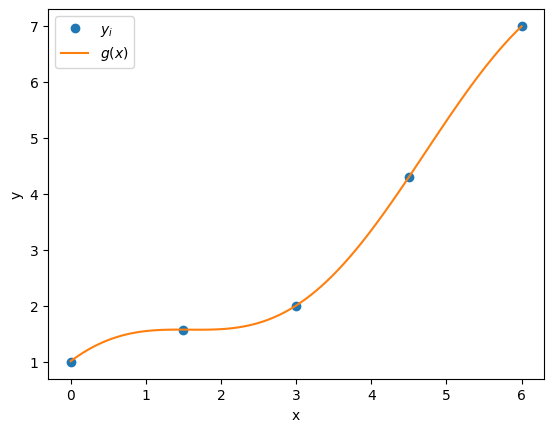

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def g(x, a):
    y = a[0]*x + a[1]*np.cos(x)
    return y

def difere(a, x, y):
    return g(x,a) - y

xi = np.array([0, 1.5, 3, 4.5, 6])
yi = np.array([1, 1.57, 2, 4.3, 7])

n = len(xi)

A = np.zeros((2,2))
b = np.zeros(2)
A[0][0] = np.vdot(xi, xi)
A[0][1] = np.vdot(xi,np.cos(xi))
A[1][0] = A[0][1]
A[1][1] = np.vdot(np.cos(xi),np.cos(xi))

b[0] = np.vdot(xi,yi)
b[1] = np.vdot(np.cos(xi),yi)

a = np.linalg.solve(A,b)
print(A)
print(b)
print("a = ", a)

res = 0
for i in range(n):
    res += difere(a, xi[i], yi[i])**2
print("residuo:", res)

x = np.linspace(xi[0],xi[n-1],100)
y = g(x, a)

plt.figure(1)
plt.plot(xi, yi, 'o', label = '$y_i$')
plt.plot(x, y, label = "$g(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Exemplo 4**

O número de bactérias por unidade de volume, existente em uma cultura após $x$ horas é apresentado na tabela:

$$\begin{array}{c|ccccc}
x_i & 0.5 & 1 & 2 & 3 & 4 & 5 & 6\\
\hline
y_i & 32 & 47 & 65 & 92 & 132 & 190 & 275 \\
\end{array}$$

(a) Verifique que uma curva para ajustar os dados é do tipo exponecial.

(b) Ajuste os dados as curvas $y = ab^x$ e $y=ax^b$. Analise os resultados comparando com os dados.

**Problema Contínuo**

No caso contínuo, o problema de ajuste de curvas consiste em: dada uma função $f(x)$ contínua em um intervalo $[a,b]$ e escolhidas as funções $g_0(x), g_1(x),\ldots, g_n(x)$ todas contínuas em $[a,b]$, queremos determinar $a_0,a_1,\ldots,a_n$ tais que a função $\displaystyle{g(x) = \sum_{k=0}^na_kg_k(x)}$ seja a melhor aproximação de $f(x)$ no intervalo $[a,b]$.

Determinar a *melhor aproximação*, como no caso discreto, significa minimizar a função resíduo dada por,

$$r({\bf a}) = \int_a^b[f(x) - \sum_{k=0}^na_kg_k(x)]^2dx.$$

No caso discreto, o resíduo era definido com uma soma finita, já o caso contínuo a definição do resíduo é feita por meio de uma integral em $[a,b]$. Para facilitar a notação, é comum utilizar a notação de produto escalar de duas funções.

1. Caso discreto $\displaystyle{<f,g> = \sum_{i=0}^m f(x_i)g(x_i)}$.
2. Caso contínuo $\displaystyle{<f,g> = \int_a^bf(x)g(x)dx}.$

Importante, lembrar que o produto escalar entre funções satisfaz as propriedades:
1. Linearidade: $\displaystyle{<ag_1+a_2g_2, f> = a_1<g_1,f>+a_2<g_2,f>}.$
2. Comutatividade: $\displaystyle{<f,g> = <g,f>}.$
3. Não negatividade: $\displaystyle{<g,g> \ge 0}$ e $\displaystyle{<g,g> = 0 \Leftrightarrow g \equiv 0}$.

**Exercício 1:** Verifique estas propriedades para os produtos escalares definidos para o caso discreto e para o caso contínuo.

Como fizemos para o caso discreto, queremos determinar os parâmetros $a_0,a_1,\ldots,a_n$ que minimizam o resíduo, ou seja, $\displaystyle{\dfrac{\partial r}{\partial a_j} = 0,}$ com $j=0,1,\ldots,n$. Assim, para cada $j$ temos uma equação da forma,
$$\int_a^b2[f(x) - \sum_{k=0}^na_kg_k(x)]g_j(x)dx = 0, \mbox{com } j = 0,\ldots, n.$$
Pelas propriedades de produto escalar, temos
$$\int_a^bf(x)g_j(x)dx -\sum_{k=0}^na_k\int_a^bg_k(x)g_j(x)dx = 0,$$
que implica em,
$$a_0\int_a^bg_0(x)g_j(x)dx + a_1\int_a^bg_1(x)g_j(x)dx + \ldots + a_n\int_a^bg_n(x)g_j(x)dx = \int_a^bf(x)g_j(x)dx.$$
Dessa forma obtemos o sistema normal,
$$\left(\begin{array}{cccc}
<g_0,g_0> & <g_1,g_0> & \ldots & <g_n,g_0> \\
<g_0,g_1> & <g_1,g_1> & \ldots & <g_n,g_1> \\
\vdots & & \ddots & \vdots \\
<g_0,g_n> & <g_1,g_n> & \ldots & <g_n,g_n>
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_n
\end{array}\right) = \left(\begin{array}{c}
<f,g_0>\\
<f,g_1>\\
\vdots\\
<f,g_n>
\end{array}\right),$$
sendo $\displaystyle{<g,f> = \int_a^bg(x)f(x)dx}$.

**Exemplo 5:**

Queremos subsituir a função $\displaystyle{f(x) = \sin\left(\frac{\pi}{4}x\right)}$ por um polinômio de grau 3, no intervalo $[0,1]$. Como a função $\displaystyle{\sin\left(\frac{\pi}{4}x\right)}$ é uma função ímpar, ou seja, $f(-x) = -f(x)$, vamos escolher um polinômio ímpar para o ajuste, $g(x) = a_0x+a_1x^3$. Isso significa, que $g_0(x) = x$ e $g_1(x) = x^3$. Assim, precisamos minimizar a função
$$r(a_0,a_1) = \int_0^1(\sin\frac{\pi}{4}x - a_0x - a_1x^3)^2dx.$$
Assim, o sistema normal é dado por,
$$\left(\begin{array}{cc}
\int_0^1x^2dx & \int_0^1x^4dx\\
\int_0^1x^4dx & \int_0^1x^6dx
\end{array}\right)
\left(\begin{array}{c}
a_0\\
\\
a_1\\
\end{array}\right) = \left(\begin{array}{c}
\int_0^1x\sin(\frac{\pi}{4}x) dx\\
\int_0^1x^3\sin(\frac{\pi}{4}x) dx
\end{array}\right),$$

Calculando as integrais (algumas por partes: $\int udv = uv -\int v du$) obtemos:

$$\begin{align}
\int_0^1x\sin(\frac{\pi}{4})dx & = -x\frac{4}{\pi}\cos(\frac{\pi}{4}x)|_0^1 + \frac{4}{\pi}\int_0^1\cos(\frac{\pi}{4}x)dx \\
& = -\frac{4}{\pi}\cos(\frac{\pi}{4})+\frac{16}{\pi^2}\sin(\frac{\pi}{4})\\
& \approx 0.2460020203444062
\end{align}$$

$$\begin{align}
\int_0^1x^3\sin(\frac{\pi}{4})dx & = -x^3\frac{4}{\pi}\cos(\frac{\pi}{4}x)|_0^1 + \frac{12}{\pi}\int_0^1 x^2\cos(\frac{\pi}{4}x)dx \\
& = -\frac{4}{\pi}\cos(\frac{\pi}{4})+\frac{12}{\pi}[\dfrac{4}{\pi}x^2\sin(\frac{\pi}{4}x)|_0^1 - \frac{8}{\pi}\int_0^1x\sin(\frac{\pi}{4}x)dx] \\
& \approx 0.14581796889606857
\end{align}$$

$$\int_0^1 x^2dx = \frac{x^3}{3}|_0^1 = \frac{1}{3}$$

$$\int_0^1 x^4dx = \frac{x^5}{5}|_0^1 = \frac{1}{5}$$

$$\int_0^1 x^6dx = \frac{x^7}{7}|_0^1 = \frac{1}{7}$$

Assim,

$$\left(\begin{array}{cc}
\dfrac{1}{3} & \dfrac{1}{5}\\
\dfrac{1}{5} & \dfrac{1}{7}
\end{array}\right) \left(\begin{array}{c}
a_0\\ \\
a_1
\end{array}\right) = \left(\begin{array}{c}
0.2460020203444062\\ \\
0.14581796889606857
\end{array}\right)$$

cuja solução é $a_0 = 0.7848162$ e $a_1 = -0.07801689$.
Portanto, a função aproximadora é $g(x) = 0.7848162x -0.07801689x^3.$

**Mínimos Quadradados com Peso**

A ideia é atribuir diferentes graus de importância no intervalo de aproximação por meio de uma função peso $w$.

**Exemplo 6**:

A tabela a seguir apresenta os preços $R_i$ de um ativo financeiro nos últimos seis meses $t_i=i$, com $i=1,2,\ldots,6$.

$$\begin{array}{c|ccccc}
t_i & 1 & 2 & 3 & 4 & 5 & 6\\
\hline
R_i & 21.3 & 21.8 & 21.2 & 21.3 & 20.5 & 21.5 \\
\end{array}$$

Deseja-se estimar o comportamento dos preços segundo uma função linear $R(t)=a_0+a_1t$. Entretanto, será dado um peso maior aos meses mais recentes por meio de $w=(0.5, 0.6, 0.5,0.8,0.9,1)$.

(a) Apresente o sistema linear obtido pelo MMQ.

(b) Faça uma estimativa do valor para o sétimo mês.

**Funções ortogonais:**

Dizemos que uma família de funções $g_i(x)$, com $i=1,2,\ldots$ é ortogonal com relação ao produto escalr associado ao peso $w(x)$ se $< g_i, g_j > = 0$, para $i\neq j$.

Essa definição vale para o caso contínuo:

$$< g_i, g_j > = \int_a^b w(x)g_i(x)g_j(x)dx$$

e para o caso discreto:

$$< g_i, g_j > = \sum_{k=1}^N w_k g_i(x_k)g_j(x_k)$$

Quando escolhemos uma combinação linear de funções ortogonais como função aproximadora, a matriz de coeficientes do sistema normal é diagonal.

Nesse caso, o sistema normal é resolvido diretamente,

$$a_i = \dfrac{< f, g_i >}{< g_i, g_i >}.$$

Exemplos de famílias de funções ortogonais:



*   As funções trigonométricas, que dão origem à série de Fourier.
*   Os polinômios ortogonais: polinômios de Legendre, Chebyshev, entre outros, que cada vez mais aparecem em problemas que envolvem aproximações.

*Análise Harmônica*

Família de funções trigonométricas: $\{1,\cos(x),\sin(x),\cos(2x),\sin(2x),\ldots,\cos(nx),\sin(nx)\}$ que são ortogonais em um intervalo de tamanho $2\pi$.

Função aproximadora: $\displaystyle{g(x)=a_0+\sum_{k=1}^n[a_k\cos(kx)+b_k\sin(kx)]}$

**Exemplo 7**:

Aproximar $\displaystyle{f(x)=\left\{\begin{array}{cc}
1, & 0\le x \le \pi \\
-1, & \pi < x \le 2\pi \\
\end{array}\right .}$ função periódica, $f(x+2\pi)=f(x)$, via método dos mínimos quadrados, com $g(x)=a_0+\sum_{k=1}^3[a_k\cos(kx)+b_k\sin(kx)]$.


**Exercício**

Determinar os polinômios de grau 1, 2 e 3 que melhor ajustam a tabela abaixo, no sentido dos quadrados mínimos. Qual deles fornece o menor resíduo?

$$\begin{array}{c|cccccc}
x & 0 & 0.15 & 0.31 & 0.5 & 0.6 & 0.75 \\
\hline
y & 1 & 1.004 & 1.031 & 1.117 & 1.223 & 1.422
\end{array}$$
